## Loadind Data

In [31]:
#importing libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Lambda, Input, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Add ,TimeDistributed,LSTM
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
#from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
#from tensorflow.keras.layers import LeakyReLU
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
#Constants
BATCH_SIZE = 500
EPOCH = 10
n_components = 2
random_state = 27

In [33]:
#loading files into dataframe from mounted google drive
df_x_train = pd.read_csv("/content/drive/MyDrive/ece657a-1221-asg3-fashionmnist-datafiles/x_train.csv")
df_y_train = pd.read_csv("/content/drive/MyDrive/ece657a-1221-asg3-fashionmnist-datafiles/y_train.csv")
df_x_test = pd.read_csv("/content/drive/MyDrive/ece657a-1221-asg3-fashionmnist-datafiles/x_test.csv")
df_y_test = pd.read_csv("/content/drive/MyDrive/ece657a-1221-asg3-fashionmnist-datafiles/y_test.csv")

In [34]:
#shapes of train and test dataset
print(df_x_test.shape,df_y_test.shape)
print(df_x_train.shape,df_y_train.shape)

(10000, 784) (10000, 1)
(60000, 784) (60000, 1)


Total number of outputs :  5
Output classes :  [0 1 2 3 4]


<BarContainer object of 5 artists>

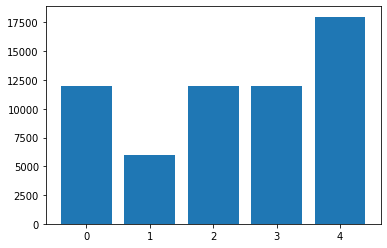

In [35]:
#number of unique classes and their class wise count
classes = np.unique(df_y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.bar(df_y_train['0'].unique(),df_y_train.value_counts())

## Data Preprocessing
*   Dividing training data into training and validation dataset in ratio of 80:20
*   Reshaping features in a 28*28 array and 1 channel(Grayscale)
*   Scaling features(x) in (0,1) by dividing by 255 [pixel range : 0-256]
*   Converting label into categorical variable [5 classes]


In [36]:
#splitting df_train in training and validation dataset
x_train, x_val, y_train, y_val = train_test_split(df_x_train, df_y_train, test_size=0.2, random_state=random_state)
print("Shape of train, validation and test dataset are : ",x_train.shape,x_val.shape, df_x_test.shape)

x_train = x_train.values.reshape((-1, 28, 28, 1))
x_val = x_val.values.reshape((-1, 28, 28, 1))
x_test = df_x_test.values.reshape((-1, 28, 28, 1))

x_train = x_train.astype("float32")/255
x_val = x_val.astype("float32")/255
x_test = x_test.astype("float32")/255
print("Shape of train, validation and test dataset are : ",x_train.shape,x_val.shape,x_test.shape)

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
y_test = to_categorical(df_y_test, num_classes=5)
print("Shape of train, validation and test for dependent variable are : ",y_train.shape,y_val.shape,y_test.shape)

Shape of train, validation and test dataset are :  (48000, 784) (12000, 784) (10000, 784)
Shape of train, validation and test dataset are :  (48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
Shape of train, validation and test for dependent variable are :  (48000, 5) (12000, 5) (10000, 5)


In [ ]:
#Initial approach for creating validatio dataset but scikit in-bulit method (train_test_split)
#provided a nice implementation and hence skipped this approach
#x_val = x_train[-10000:]
#y_val = y_train[-10000:]
#x_train = x_train[:-10000]
#y_train = y_train[:-10000]

## CM1 : Default CNN
Convolution Neural Network

In [37]:
#CM1 Model as defined in A3
model= Sequential(name="CM1")
model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1), padding = 'same',name = 'Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool'))
model.add(Conv2D(32, (3, 3), activation='relu',name = 'Conv2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(256, activation='relu',name = 'Dense'))
model.add(Dense(5, activation='softmax',name = 'Softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()

Model: "CM1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 MaxPool (MaxPooling2D)      (None, 14, 14, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 12, 12, 32)        9248      
                                                                 
 Flatten (Flatten)           (None, 4608)              0         
                                                                 
 Dense (Dense)               (None, 256)               1179904   
                                                                 
 Softmax (Dense)             (None, 5)                 1285      
                                                                 
Total params: 1,190,757
Trainable params: 1,190,757
Non-trainab

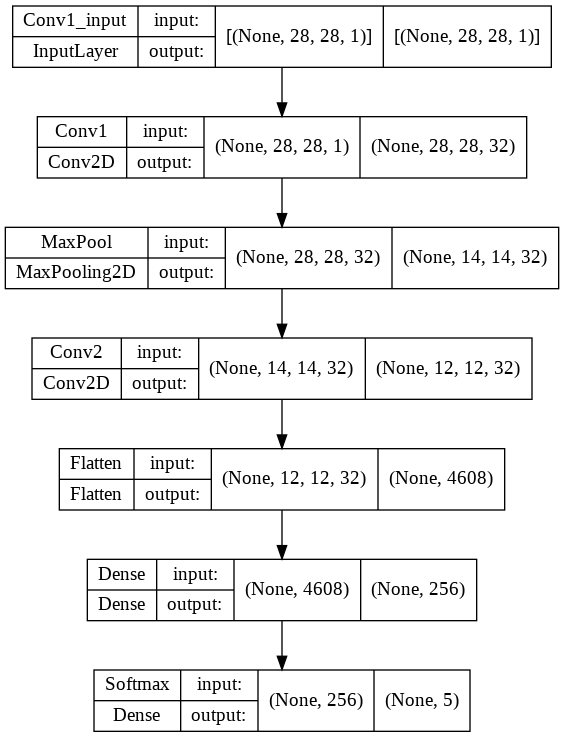

In [39]:
#Just another wway to visualize model architecture
tf.keras.utils.plot_model(model, to_file='CM1.png', show_shapes=True)

In [40]:
#To include early stopping (depends on patience or loss)
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#Time perfrormance for train dataset
start = time.time()
#Fitting the model 
cm1_history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=50,
          shuffle = True,
          #callbacks=[es],
          validation_data=(x_val, y_val))
print("Total time: ", time.time() - start, "seconds")

Epoch 1/50
96/96 [==============================] - 42s 429ms/step - loss: 0.4832 - accuracy: 0.8102 - val_loss: 0.3401 - val_accuracy: 0.8763
Epoch 2/50
96/96 [==============================] - 41s 424ms/step - loss: 0.2926 - accuracy: 0.8950 - val_loss: 0.2787 - val_accuracy: 0.9006
Epoch 3/50
96/96 [==============================] - 41s 422ms/step - loss: 0.2504 - accuracy: 0.9103 - val_loss: 0.2400 - val_accuracy: 0.9154
Epoch 4/50
96/96 [==============================] - 40s 414ms/step - loss: 0.2158 - accuracy: 0.9241 - val_loss: 0.2148 - val_accuracy: 0.9236
Epoch 5/50
96/96 [==============================] - 40s 416ms/step - loss: 0.1947 - accuracy: 0.9304 - val_loss: 0.2119 - val_accuracy: 0.9273
Epoch 6/50
96/96 [==============================] - 39s 409ms/step - loss: 0.1769 - accuracy: 0.9369 - val_loss: 0.2041 - val_accuracy: 0.9258
Epoch 7/50
96/96 [==============================] - 40s 413ms/step - loss: 0.1656 - accuracy: 0.9408 - val_loss: 0.2022 - val_accuracy: 0.9288

In [41]:
#evaluation
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Val: %.3f,Test: %.3f' % (train_acc*100, val_acc*100, test_acc*100))

Train: 100.000, Val: 94.492,Test: 93.960


In [42]:
#Time perfrormance for test dataset
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
print("Testing time : ", time_taken)

Testing time :  3.376964807510376


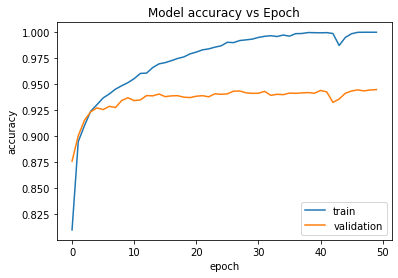

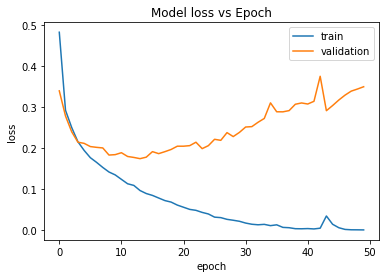

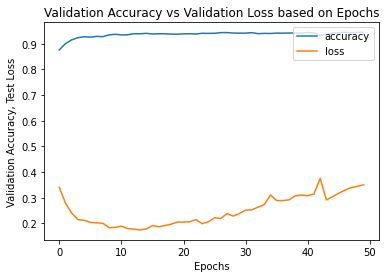

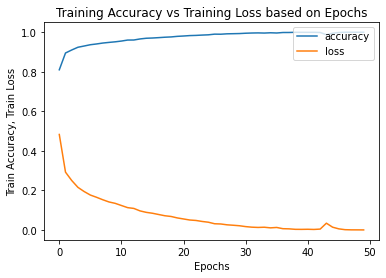

In [43]:
#Plots: Visualization of accuracy vs epoch and loss vs epoch

plt.plot(cm1_history.history['accuracy'])
plt.plot(cm1_history.history['val_accuracy'])
plt.title('Model accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(cm1_history.history['loss'])
plt.plot(cm1_history.history['val_loss'])
plt.title('Model loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(cm1_history.history['val_accuracy'])
plt.plot(cm1_history.history['val_loss'])
plt.title('Validation Accuracy vs Validation Loss based on Epochs')
plt.ylabel('Validation Accuracy, Test Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

plt.plot(cm1_history.history['accuracy'])
plt.plot(cm1_history.history['loss'])
plt.title('Training Accuracy vs Training Loss based on Epochs')
plt.ylabel('Train Accuracy, Train Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

#### Comments:

* We obtain ~94% accuracy on test dataset for this simple CNN model. 
* We tried with different epochs to see the impact of local minima and observed that validation loss started increasing and validation accuracy fluctuated in small increments but on both sides of scale. The data gave significant accuracy in few epochs (as low as 5).
* Adam Optimizer yielded better accuracy comapred to SGD.
* Categorical_crossentropy loss function gave better accuracy measure compared to other loss functions.
* Runtime for training and testing suggests good performance (quite fast). 

## CM2 : Own Network

> We implememt a simple CNN model , a variant of CM1 model byy adding a conv layer and dense layer. We implement more spohisticated CNN architectures in subsequent sections to compare the impact of different components in architecture.

#### CNN1
**To experiment with the imapct of iterative increase and decrease in filter size(increasing and decreasing volume) and an added dense layer (better relationship in features)**
* We use Adaptive Moment Estimation (Adam) optimizer with default value
* We make use of categorical cross entrpy as loss function 
* We make use of 3 Conv2D layer but with different kernel sizes (32,64 and 32 respectively) followed by a flatten layer and 2 Dense layers with 256 and 128 neurons and finally a softmax max function to give probabilities in (0,1) range for our 5 class classification task. Complete model architecture is given below.
* We make use of ReLU activation function (Leaky ReLU yielded similar performance)
* Model converged faster with Adam Optimizer than SGD.


In [ ]:
model= Sequential(name="CNN1")
model.add(Conv2D(32, kernel_size=(3, 3),strides=(1, 1),activation='relu',
                 input_shape=(28,28,1), padding = 'same',name = 'Conv1'))
model.add(Conv2D(64, (3, 3), activation='relu',name = 'Conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool'))
model.add(Conv2D(32, (3, 3), activation='relu',name = 'Conv3'))
model.add(Flatten(name='Flatten'))
model.add(Dense(256, activation='relu',name = 'Dense1'))
model.add(Dense(128, activation='relu',name = 'Dense2'))
model.add(Dense(5, activation='softmax',name = 'Softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 Conv2 (Conv2D)              (None, 26, 26, 64)        18496     
                                                                 
 MaxPool (MaxPooling2D)      (None, 13, 13, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 11, 11, 32)        18464     
                                                                 
 Flatten (Flatten)           (None, 3872)              0         
                                                                 
 Dense1 (Dense)              (None, 256)               991488    
                                                                 
 Dense2 (Dense)              (None, 128)               32896  

In [ ]:
start = time.time()
CNN1_history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCH,
          shuffle = True,
          validation_data=(x_val, y_val))
print("Total time: ", time.time() - start, "seconds")

Epoch 1/10
96/96 [==============================] - 152s 2s/step - loss: 0.5250 - accuracy: 0.7914 - val_loss: 0.3352 - val_accuracy: 0.8779
Epoch 2/10
96/96 [==============================] - 120s 1s/step - loss: 0.2822 - accuracy: 0.8986 - val_loss: 0.2608 - val_accuracy: 0.9069
Epoch 3/10
96/96 [==============================] - 120s 1s/step - loss: 0.2262 - accuracy: 0.9187 - val_loss: 0.2260 - val_accuracy: 0.9189
Epoch 4/10
96/96 [==============================] - 119s 1s/step - loss: 0.1879 - accuracy: 0.9334 - val_loss: 0.2146 - val_accuracy: 0.9225
Epoch 5/10
96/96 [==============================] - 119s 1s/step - loss: 0.1669 - accuracy: 0.9395 - val_loss: 0.1893 - val_accuracy: 0.9324
Epoch 6/10
96/96 [==============================] - 118s 1s/step - loss: 0.1508 - accuracy: 0.9456 - val_loss: 0.1865 - val_accuracy: 0.9327
Epoch 7/10
96/96 [==============================] - 116s 1s/step - loss: 0.1307 - accuracy: 0.9534 - val_loss: 0.1840 - val_accuracy: 0.9328
Epoch 8/10
96

In [ ]:
#evaluation
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Val: %.3f,Test: %.3f' % (train_acc*100, val_acc*100, test_acc*100))

Train: 97.206, Val: 93.967,Test: 93.820


In [ ]:
#Time perfrormance for test dataset
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
print("Testing time : ", time_taken)

Testing time :  5.968332529067993


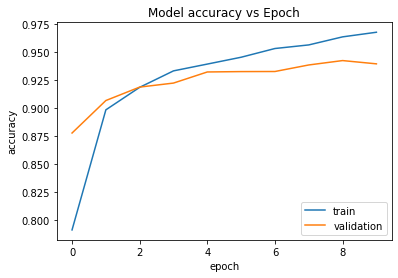

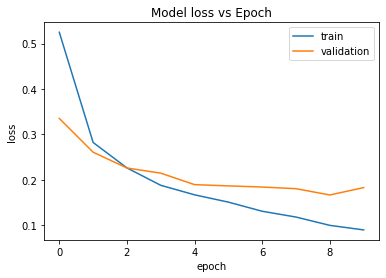

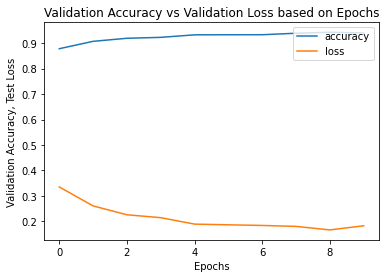

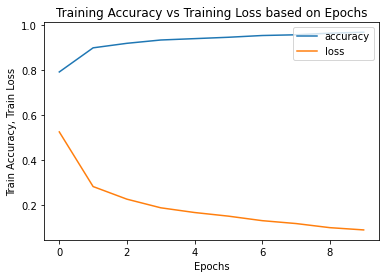

In [ ]:
#Plots: Visualization of accuracy vs epoch and loss vs epoch
plt.plot(CNN1_history.history['accuracy'])
plt.plot(CNN1_history.history['val_accuracy'])
plt.title('Model accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(CNN1_history.history['loss'])
plt.plot(CNN1_history.history['val_loss'])
plt.title('Model loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(CNN1_history.history['val_accuracy'])
plt.plot(CNN1_history.history['val_loss'])
plt.title('Validation Accuracy vs Validation Loss based on Epochs')
plt.ylabel('Validation Accuracy, Test Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

plt.plot(CNN1_history.history['accuracy'])
plt.plot(CNN1_history.history['loss'])
plt.title('Training Accuracy vs Training Loss based on Epochs')
plt.ylabel('Train Accuracy, Train Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

### Comments 

We observed ~94% accuracy with our own CNN model.

## CM3 : Own Network


*   CNN2    : Adding Dropout layers
*   CNN3    : Experimenting imapct of Optimizers (SGD)
*   CNN4    : Experimention with activation function (Leaky ReLU)
*   CNN_VGG : Inspiration from VGG16 (focusing on increasing volume)
*   LSTM    : Long Short term memory architecture


### CNN2

> We added Dropout layers to see the imapct of regularization.We use rate=0.3 as argument i.e, the fraction of the input units to be dropped at each layer. It is a fraction between 0 and 1 and is used to prevent overfitting

In [ ]:
model = Sequential(name="CNN_2")

model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1), padding = 'same',name = 'Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool1'))
model.add(Dropout(0.3))


model.add(Conv2D(32, (3, 3), activation='relu',name = 'Conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool2'))
model.add(Dropout(0.3))

model.add(Flatten(name = 'Flatten'))

model.add(Dense(256, activation='relu',name = 'Dense1'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu',name = 'Dense2'))

model.add(Dense(5, activation='softmax',name = 'Softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "CNN_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 12, 12, 32)        9248      
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 6, 6, 32)          0         
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0         
                                                                 
 Flatten (Flatten)           (None, 1152)              0     

In [ ]:
start = time.time()
CNN_2_history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCH,
          shuffle = True,
          validation_data=(x_val, y_val))
print("Total time: ", time.time() - start, "seconds")

Epoch 1/10
96/96 [==============================] - 31s 318ms/step - loss: 0.7341 - accuracy: 0.6894 - val_loss: 0.4416 - val_accuracy: 0.8261
Epoch 2/10
96/96 [==============================] - 31s 318ms/step - loss: 0.4404 - accuracy: 0.8289 - val_loss: 0.3444 - val_accuracy: 0.8695
Epoch 3/10
96/96 [==============================] - 31s 320ms/step - loss: 0.3754 - accuracy: 0.8585 - val_loss: 0.2996 - val_accuracy: 0.8892
Epoch 4/10
96/96 [==============================] - 31s 320ms/step - loss: 0.3337 - accuracy: 0.8760 - val_loss: 0.2678 - val_accuracy: 0.9025
Epoch 5/10
96/96 [==============================] - 30s 317ms/step - loss: 0.3094 - accuracy: 0.8867 - val_loss: 0.2470 - val_accuracy: 0.9093
Epoch 6/10
96/96 [==============================] - 31s 319ms/step - loss: 0.2866 - accuracy: 0.8951 - val_loss: 0.2342 - val_accuracy: 0.9116
Epoch 7/10
96/96 [==============================] - 31s 319ms/step - loss: 0.2725 - accuracy: 0.8998 - val_loss: 0.2223 - val_accuracy: 0.9168

In [ ]:
#evaluation
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Val: %.3f,Test: %.3f' % (train_acc*100, val_acc*100, test_acc*100))

#Time perfrormance for test dataset
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
print("Testing time : ", time_taken)

Train: 93.448, Val: 92.683,Test: 92.420
Testing time :  1.8049075603485107


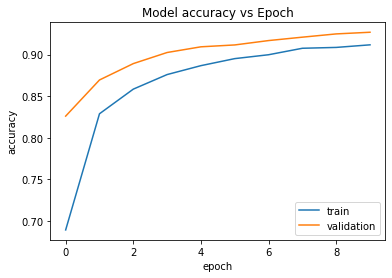

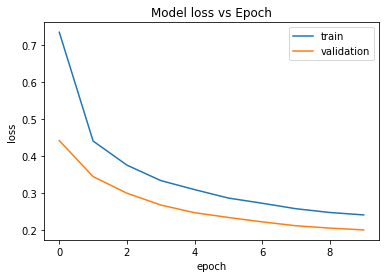

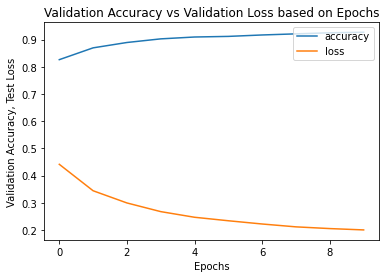

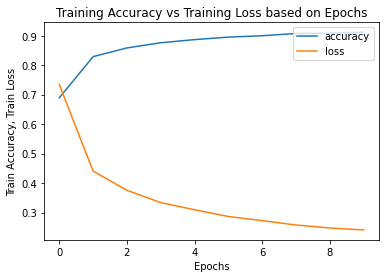

In [ ]:
plt.plot(CNN_2_history.history['accuracy'])
plt.plot(CNN_2_history.history['val_accuracy'])
plt.title('Model accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(CNN_2_history.history['loss'])
plt.plot(CNN_2_history.history['val_loss'])
plt.title('Model loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(CNN_2_history.history['val_accuracy'])
plt.plot(CNN_2_history.history['val_loss'])
plt.title('Validation Accuracy vs Validation Loss based on Epochs')
plt.ylabel('Validation Accuracy, Test Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

plt.plot(CNN_2_history.history['accuracy'])
plt.plot(CNN_2_history.history['loss'])
plt.title('Training Accuracy vs Training Loss based on Epochs')
plt.ylabel('Train Accuracy, Train Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

### CNN3

> Trained the model with Stochastic Gradient Descent (SGD) Optimizer. 

In [ ]:
model = Sequential(name="CNN_3")

model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1), padding = 'same',name = 'Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool1'))
model.add(Conv2D(32, (3, 3), activation='relu',name = 'Conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool2'))
model.add(Dropout(0.3))
model.add(Flatten(name = 'Flatten'))
model.add(Dense(256, activation='relu',name = 'Dense1'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',name = 'Dense2'))
model.add(Dense(5, activation='softmax',name = 'Softmax'))
model.compile(loss='categorical_crossentropy', optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
start = time.time()
CNN_3_history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCH,
          shuffle = True,
          validation_data=(x_val, y_val))
print("Total time: ", time.time() - start, "seconds")

Epoch 1/10
96/96 [==============================] - 28s 292ms/step - loss: 1.5011 - accuracy: 0.3079 - val_loss: 1.3404 - val_accuracy: 0.5020
Epoch 2/10
96/96 [==============================] - 28s 292ms/step - loss: 1.2983 - accuracy: 0.4315 - val_loss: 1.0609 - val_accuracy: 0.6069
Epoch 3/10
96/96 [==============================] - 29s 306ms/step - loss: 1.1244 - accuracy: 0.5020 - val_loss: 0.9144 - val_accuracy: 0.6252
Epoch 4/10
96/96 [==============================] - 30s 311ms/step - loss: 1.0229 - accuracy: 0.5493 - val_loss: 0.8435 - val_accuracy: 0.6422
Epoch 5/10
96/96 [==============================] - 28s 294ms/step - loss: 0.9528 - accuracy: 0.5888 - val_loss: 0.7829 - val_accuracy: 0.6808
Epoch 6/10
96/96 [==============================] - 28s 296ms/step - loss: 0.9059 - accuracy: 0.6157 - val_loss: 0.7398 - val_accuracy: 0.7044
Epoch 7/10
96/96 [==============================] - 29s 298ms/step - loss: 0.8619 - accuracy: 0.6402 - val_loss: 0.7052 - val_accuracy: 0.7117

In [ ]:
#evaluation
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Val: %.3f,Test: %.3f' % (train_acc*100, val_acc*100, test_acc*100))

#Time perfrormance for test dataset
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
print("Testing time : ", time_taken)

Train: 75.352, Val: 75.400,Test: 75.210
Testing time :  1.7907054424285889


### CNN4

> We trained the model with LeakyReLu activation function. It is a variant of ReLU and introduces a small gradient for negative value instead of ) as in ReLU. Both are similar in that their derivative is monotonic and continous, They both are able to solve the problem of exploding and vanishing gradients.

In [ ]:
model = Sequential(name="CNN_4")

model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1, 1),
                 activation=tf.keras.layers.LeakyReLU(alpha=0.2),
                 input_shape=(28,28,1), padding = 'same',name = 'Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool1'))
model.add(Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.2),name = 'Conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool2'))
model.add(Dropout(0.3))
model.add(Flatten(name = 'Flatten'))
model.add(Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2),name = 'Dense1'))
model.add(Dropout(0.5))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2),name = 'Dense2'))
model.add(Dense(5, activation='softmax',name = 'Softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
start = time.time()
CNN_4_history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCH,
          shuffle = True,
          validation_data=(x_val, y_val))
print("Total time: ", time.time() - start, "seconds")

Epoch 1/10
96/96 [==============================] - 32s 327ms/step - loss: 0.6416 - accuracy: 0.7396 - val_loss: 0.3685 - val_accuracy: 0.8621
Epoch 2/10
96/96 [==============================] - 31s 324ms/step - loss: 0.3715 - accuracy: 0.8617 - val_loss: 0.3028 - val_accuracy: 0.8909
Epoch 3/10
96/96 [==============================] - 31s 322ms/step - loss: 0.3203 - accuracy: 0.8828 - val_loss: 0.2707 - val_accuracy: 0.9013
Epoch 4/10
96/96 [==============================] - 31s 322ms/step - loss: 0.2886 - accuracy: 0.8949 - val_loss: 0.2443 - val_accuracy: 0.9107
Epoch 5/10
96/96 [==============================] - 31s 322ms/step - loss: 0.2645 - accuracy: 0.9022 - val_loss: 0.2264 - val_accuracy: 0.9176
Epoch 6/10
96/96 [==============================] - 31s 322ms/step - loss: 0.2501 - accuracy: 0.9099 - val_loss: 0.2211 - val_accuracy: 0.9201
Epoch 7/10
96/96 [==============================] - 31s 322ms/step - loss: 0.2366 - accuracy: 0.9143 - val_loss: 0.2096 - val_accuracy: 0.9241

In [ ]:
#evaluation
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Val: %.3f,Test: %.3f' % (train_acc*100, val_acc*100, test_acc*100))

#Time perfrormance for test dataset
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
print("Testing time : ", time_taken)

Train: 94.356, Val: 93.258,Test: 92.960
Testing time :  2.2175590991973877


### CNN_VGG

> VGG is an popular image classifictaion model using fewer CNN layers compared to other image classification algorithms such as AleXNet, LeNet and others. It successively increases the volume by addinD CNN layers with a larger filter size and finally using multiple fully connected layers to learn relationship between features.

In [ ]:
model = Sequential(name="CNN_VGG")

model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1), padding = 'same',name = 'Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool1'))
model.add(Conv2D(64, (3, 3), activation='relu',name = 'Conv2'))

model.add(Conv2D(128, (3, 3), activation='relu',name = 'Conv3'))
model.add(Conv2D(128, (3, 3), activation='relu',name = 'Conv4'))


model.add(Conv2D(256, (3, 3), activation='relu',name = 'Conv5'))
model.add(Conv2D(256, (3, 3), activation='relu',name = 'Conv6'))

model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool4'))
model.add(Flatten(name = 'Flatten'))

model.add(Dense(1024, activation='relu',name = 'Dense1'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',name = 'Dense2'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu',name = 'Dense3'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax',name = 'Softmax'))

model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "CNN_VGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 12, 12, 64)        18496     
                                                                 
 Conv3 (Conv2D)              (None, 10, 10, 128)       73856     
                                                                 
 Conv4 (Conv2D)              (None, 8, 8, 128)         147584    
                                                                 
 Conv5 (Conv2D)              (None, 6, 6, 256)         295168    
                                                                 
 Conv6 (Conv2D)              (None, 4, 4, 256)         5900

In [ ]:
start = time.time()
CNN_VGG_history = model.fit(x_train, y_train,
          batch_size=400,
          epochs=5,
          shuffle = True,
          validation_data=(x_val, y_val))
print("Total time: ", time.time() - start, "seconds")

Epoch 1/5
120/120 [==============================] - 290s 2s/step - loss: 1.1276 - accuracy: 0.4862 - val_loss: 0.5640 - val_accuracy: 0.7650
Epoch 2/5
120/120 [==============================] - 283s 2s/step - loss: 0.5131 - accuracy: 0.7983 - val_loss: 0.3830 - val_accuracy: 0.8514
Epoch 3/5
120/120 [==============================] - 281s 2s/step - loss: 0.3902 - accuracy: 0.8560 - val_loss: 0.3422 - val_accuracy: 0.8744
Epoch 4/5
120/120 [==============================] - 288s 2s/step - loss: 0.3277 - accuracy: 0.8822 - val_loss: 0.2951 - val_accuracy: 0.8902
Epoch 5/5
120/120 [==============================] - 303s 3s/step - loss: 0.2972 - accuracy: 0.8944 - val_loss: 0.3023 - val_accuracy: 0.8842
Total time:  1462.7450199127197 seconds


In [ ]:
#evaluation
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Val: %.3f,Test: %.3f' % (train_acc*100, val_acc*100, test_acc*100))

#Time perfrormance for test dataset
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
print("Testing time : ", time_taken)

Train: 89.415, Val: 88.417,Test: 88.040
Testing time :  13.466981887817383


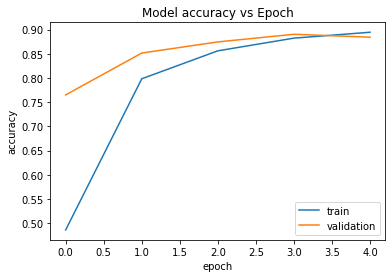

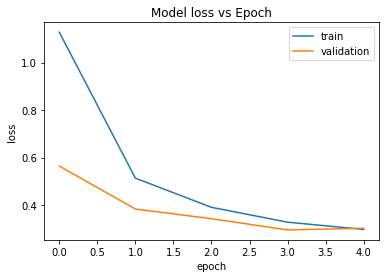

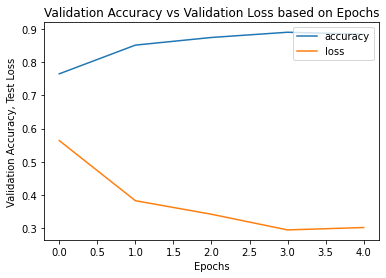

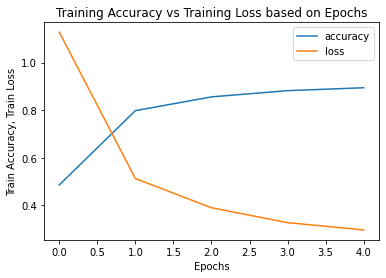

In [ ]:
plt.plot(CNN_VGG_history.history['accuracy'])
plt.plot(CNN_VGG_history.history['val_accuracy'])
plt.title('Model accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(CNN_VGG_history.history['loss'])
plt.plot(CNN_VGG_history.history['val_loss'])
plt.title('Model loss vs Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(CNN_VGG_history.history['val_accuracy'])
plt.plot(CNN_VGG_history.history['val_loss'])
plt.title('Validation Accuracy vs Validation Loss based on Epochs')
plt.ylabel('Validation Accuracy, Test Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

plt.plot(CNN_VGG_history.history['accuracy'])
plt.plot(CNN_VGG_history.history['loss'])
plt.title('Training Accuracy vs Training Loss based on Epochs')
plt.ylabel('Train Accuracy, Train Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

### LSTM

> Long Short Term Memory are special type of Recurrent Neural network (RNN) architecture i sable to learn long range dependencies. It has input and forget gate whose values are calculated based on previous cell state and previous hidden state.

In [ ]:
row_hidden = 128
col_hidden = 128
num_classes = 5
row, col, pixel = x_train.shape[1:]
x = Input(shape=(row, col, pixel))
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)
encoded_columns = LSTM(col_hidden)(encoded_rows)
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 time_distributed (TimeDistr  (None, 28, 128)          66560     
 ibuted)                                                         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
Total params: 198,789
Trainable params: 198,789
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCH,
          verbose=1,
          validation_data=(x_val, y_val))
print("Total time: ", time.time() - start, "seconds")

Epoch 1/10
96/96 [==============================] - 457s 5s/step - loss: 1.0675 - accuracy: 0.5205 - val_loss: 0.7682 - val_accuracy: 0.6822
Epoch 2/10
96/96 [==============================] - 447s 5s/step - loss: 0.7299 - accuracy: 0.6923 - val_loss: 0.6500 - val_accuracy: 0.7227
Epoch 3/10
96/96 [==============================] - 481s 5s/step - loss: 0.6108 - accuracy: 0.7523 - val_loss: 0.5363 - val_accuracy: 0.7925
Epoch 4/10
96/96 [==============================] - 489s 5s/step - loss: 0.5445 - accuracy: 0.7859 - val_loss: 0.5266 - val_accuracy: 0.7949
Epoch 5/10
96/96 [==============================] - 515s 5s/step - loss: 0.4983 - accuracy: 0.8077 - val_loss: 0.4239 - val_accuracy: 0.8419
Epoch 6/10
96/96 [==============================] - 512s 5s/step - loss: 0.4539 - accuracy: 0.8259 - val_loss: 0.4301 - val_accuracy: 0.8392
Epoch 7/10
96/96 [==============================] - 514s 5s/step - loss: 0.4164 - accuracy: 0.8430 - val_loss: 0.3707 - val_accuracy: 0.8652
Epoch 8/10
96

In [ ]:
#evaluation
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Val: %.3f,Test: %.3f' % (train_acc*100, val_acc*100, test_acc*100))

Train: 86.106, Val: 85.750,Test: 85.130


In [ ]:
#Time perfrormance for test dataset
start_time = time.time()
y_pred = model.predict(x_test)
end_time = time.time()
time_taken = end_time - start_time
print("Testing time : ", time_taken)

Testing time :  42.44548010826111


### Comparisons

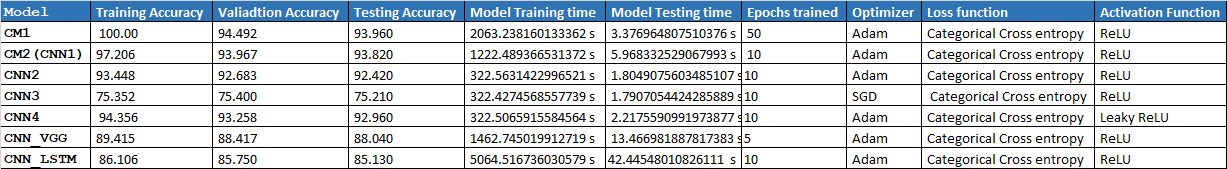

### Observations:

> When trained with same Epoch =10 and batch size of 500 images , the models performed similar except CNN3(SGD optimizer) and CNN_VGG and LSTM architectures. This is possibly as SGD takes longer to converge but generalizes better(argued in various papers). LSTM and CNN_VGG are complex models with greater number of parameters to learn. This is also apparent through the runtime performance for these models. THe plots for model accuracy vs epochs and model loss vs epoch are plotted above and it is observed that in complex models it doe snot each its optimal trainng accuracy and loss did not start increasing whereas in simpler models , models trained much faster and tend to overfit (as apparen by increase in loss function).


## CM4 : Using your own encoding

In [ ]:
model = Sequential(name="CNN_2")

model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1), padding = 'same',name = 'Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool1'))
#model.add(Dropout(0.3))


model.add(Conv2D(32, (3, 3), activation='relu',name = 'Conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name = 'MaxPool2'))
model.add(Dropout(0.3))

model.add(Flatten(name = 'Flatten'))

model.add(Dense(256, activation='relu',name = 'Dense1'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu',name = 'Dense2'))

model.add(Dense(5, activation='softmax',name = 'Softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
CNN_2_history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=3,
          shuffle = True,
          validation_data=(x_val, y_val))

Epoch 1/3
96/96 [==============================] - 39s 388ms/step - loss: 0.6579 - accuracy: 0.7325 - val_loss: 0.3782 - val_accuracy: 0.8569
Epoch 2/3
96/96 [==============================] - 32s 338ms/step - loss: 0.3884 - accuracy: 0.8553 - val_loss: 0.3047 - val_accuracy: 0.8897
Epoch 3/3
96/96 [==============================] - 32s 337ms/step - loss: 0.3304 - accuracy: 0.8783 - val_loss: 0.2699 - val_accuracy: 0.8997


### Intermediate Layer Model

In [ ]:
dense_layer_output = [layer.output for layer in model.layers if layer.name == 'Dense2']
extractor = Model(inputs=model.inputs,outputs=dense_layer_output)
features = extractor(x_test)

In [ ]:
print(type(features))
print(len(features))
print(len(x_test))

<class 'tensorflow.python.framework.ops.EagerTensor'>
10000
10000


### PCA on extracted features

In [ ]:
pca = PCA(n_components=n_components, random_state=random_state)
pca.fit(features)
x = pca.transform(features)

In [ ]:
principalDf = pd.DataFrame(data = x
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_y_test[['0']]], axis = 1)

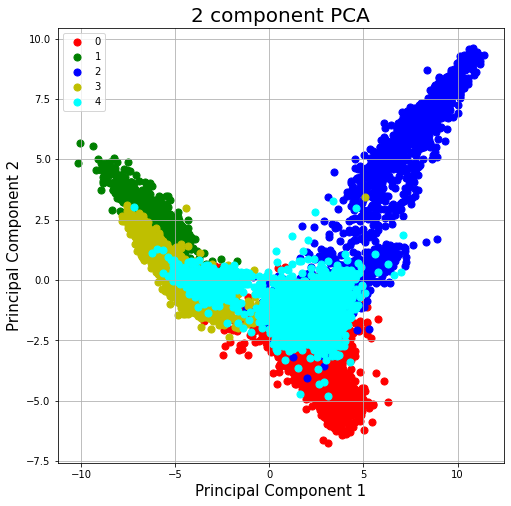

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = classes
colors = ['r', 'g', 'b','y','cyan']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['0'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

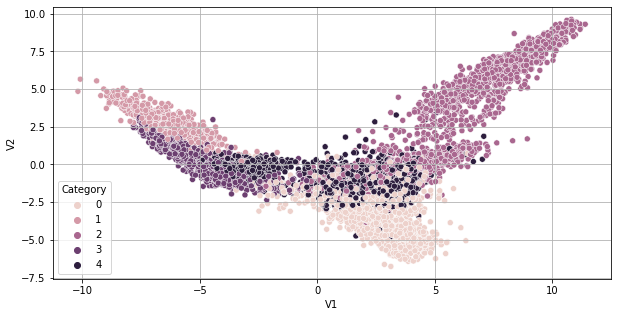

In [ ]:
dimReducedDataFrame = pd.DataFrame(x)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2'})
dimReducedDataFrame['Category'] = df_y_test['0']
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',hue = 'Category')
plt.grid(True)
plt.show()

### KMeans 

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=22)
kmeans.fit(features)

KMeans(n_clusters=5, random_state=22)

In [ ]:
#kmeans = KMeans(n_clusters=5, random_state=random_state)
#z=kmeans.fit_transform(features)

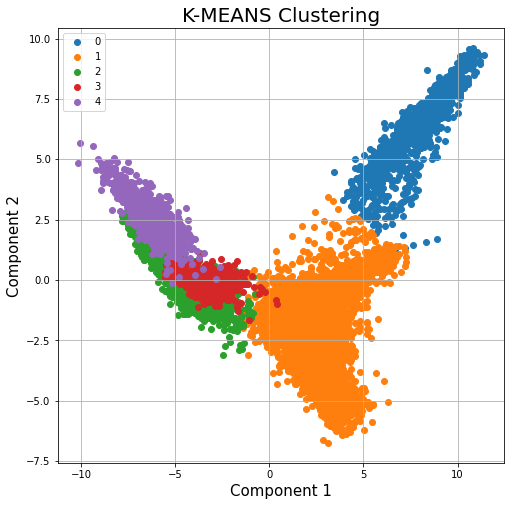

<Figure size 576x576 with 0 Axes>

In [ ]:
label = kmeans.fit_predict(features)
u_labels = np.unique(label)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('K-MEANS Clustering', fontsize = 20)
fig = plt.figure(figsize = (8,8)) 
for i in u_labels:
    ax.scatter(x[label == i , 0] , x[label == i , 1] , label = i)
ax.legend()
ax.grid()

In [ ]:
#unique, counts = np.unique(label, return_counts=True)
#print(unique, counts)

[0 1 2 3 4] [4951 2113  848 1022 1066]


In [ ]:
#df_y_test['0'].value_counts()

4    3000
2    2000
0    2000
3    2000
1    1000
Name: 0, dtype: int64

### DBSCAN

#### Finding optimal value of epsilon

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

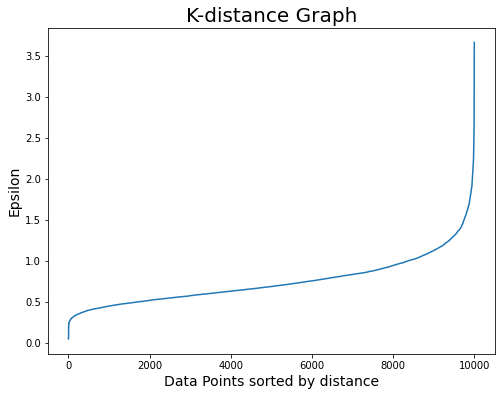

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### DBSCAN using extracted features

In [ ]:
dbscan_opt=DBSCAN(eps=1.6,min_samples=60)
#d = dbscan_opt.fit_predict(features)
d = dbscan_opt.fit(features)

In [ ]:
principalDf['DBSCAN_opt_labels'] = dbscan_opt.labels_
print(dbscan_opt.labels_)
print(np.unique(dbscan_opt.labels_))
print(principalDf['DBSCAN_opt_labels'].value_counts())

[ 0 -1  1 ... -1  1  0]
[-1  0  1  2  3  4]
 2    4626
 0    1975
-1    1281
 1     839
 3     699
 4     580
Name: DBSCAN_opt_labels, dtype: int64


No handles with labels found to put in legend.


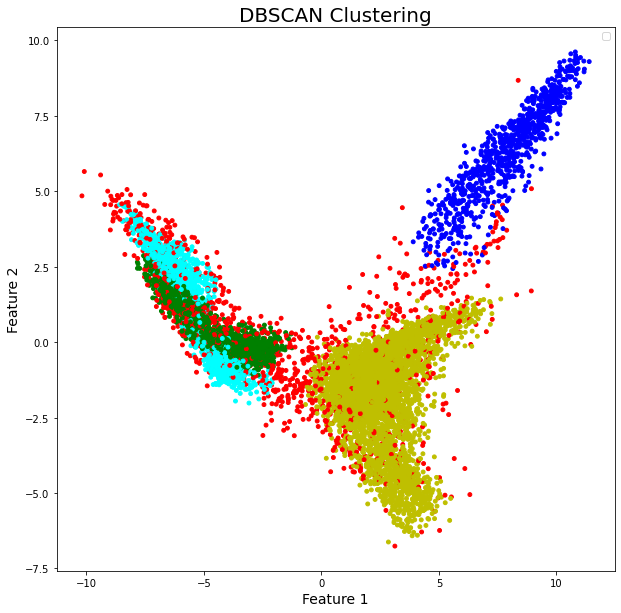

In [ ]:
import matplotlib
plt.figure(figsize=(10,10))
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=principalDf['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.legend()
plt.show()

### T-SNE

In [ ]:
tsne = TSNE(n_components=n_components,  random_state=random_state)#verbose=1
z = tsne.fit_transform(features) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
tsneDf = pd.DataFrame(data = z
             , columns = ['component 1', 'component 2'])
finalDf = pd.concat([tsneDf, df_y_test[['0']]], axis = 1)

[Text(0.5, 1.0, 'T-SNE projection')]

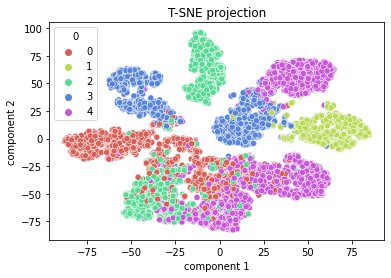

In [ ]:
sb.scatterplot(x="component 1", y="component 2", hue=finalDf['0'],
                palette=sb.color_palette("hls", 5),
                data=finalDf).set(title="T-SNE projection") 

### K-Means Clustering

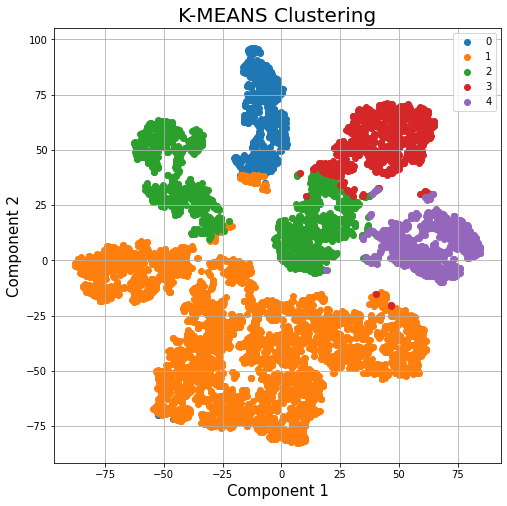

<Figure size 576x576 with 0 Axes>

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=22)
kmeans.fit(features)
label = kmeans.fit_predict(features)
u_labels = np.unique(label)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('K-MEANS Clustering', fontsize = 20)
fig = plt.figure(figsize = (8,8)) 
for i in u_labels:
    ax.scatter(z[label == i , 0] , z[label == i , 1] , label = i)
ax.legend()
ax.grid()

### DBSCAN Clustering

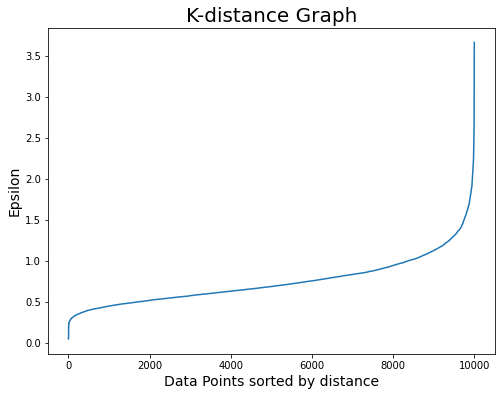

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
dbscan_opt=DBSCAN(eps=1.6,min_samples=60)
#d = dbscan_opt.fit_predict(features)
d = dbscan_opt.fit(features)
finalDf['DBSCAN_opt_labels'] = dbscan_opt.labels_
print(dbscan_opt.labels_)
print(np.unique(dbscan_opt.labels_))
print(finalDf['DBSCAN_opt_labels'].value_counts())

[ 0 -1  1 ... -1  1  0]
[-1  0  1  2  3  4]
 2    4626
 0    1975
-1    1281
 1     839
 3     699
 4     580
Name: DBSCAN_opt_labels, dtype: int64


No handles with labels found to put in legend.


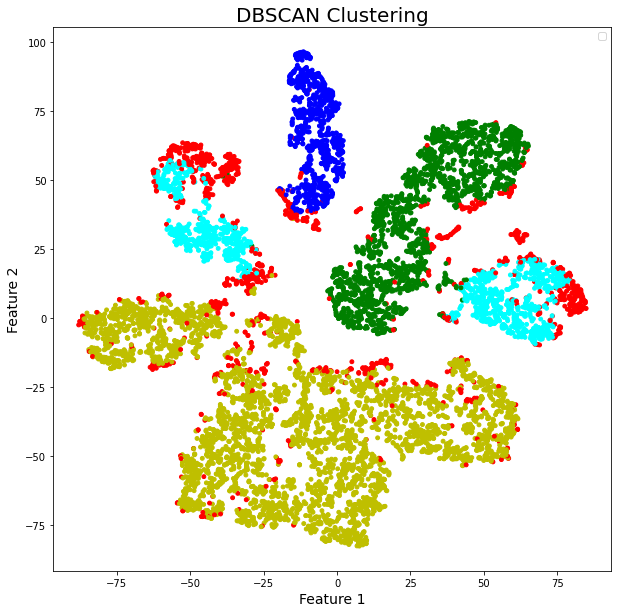

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(finalDf['component 1'],finalDf['component 2'],c=finalDf['DBSCAN_opt_labels'],
            cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.legend()
plt.show()

### Decoding mystery labels

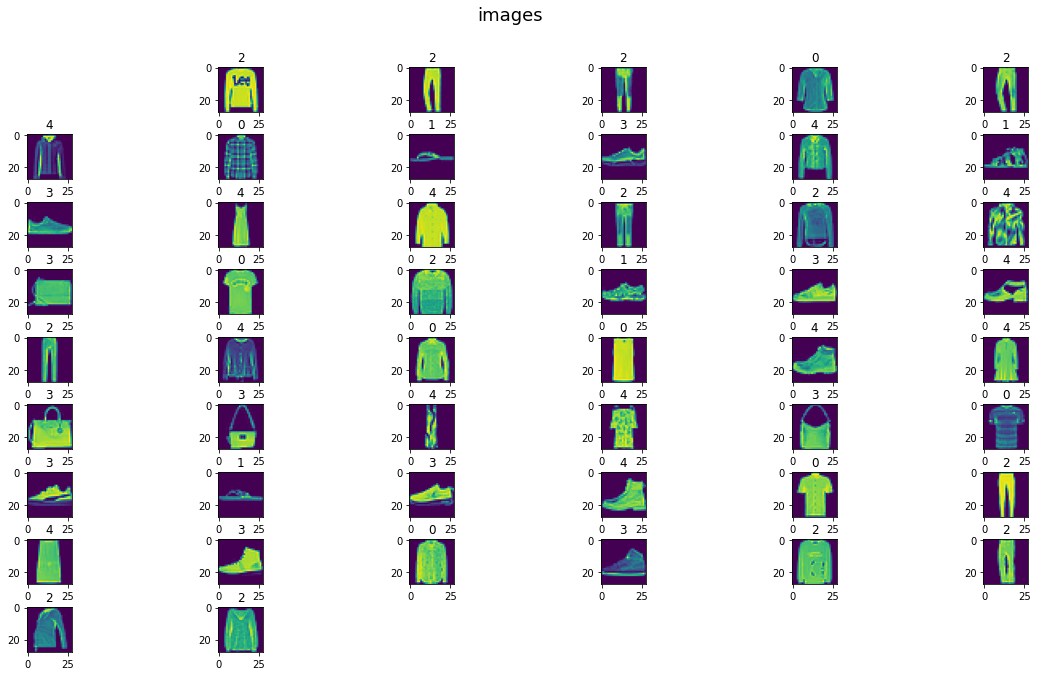

In [24]:
from PIL import Image
rows=10
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("images", fontsize=18, y=0.95)

for i in range(1,50):
  #print(i)
  #print(df_x_test[:i].shape)
  img=df_x_test.iloc[i].values.reshape((28,28,1))
  pil_img = tf.keras.preprocessing.image.array_to_img(img)
  plt.subplot(rows,6,i+1)
  plt.title(df_y_test['0'].iloc[i])
  plt.imshow(pil_img)
  #plt.show()

### Mystery Labels Decoded

We plotted images with their true labels from test dataset and with predicted labels using KMeans on features encoding applied on test dataset. These are the major classes/ labels that are associated with category, although broader category (Summer wear, Winterwear or clothing material ) is hard to define because of certain labels having mixed classes, we define grouped labels on the granular/ initial fashion mnist dataset labels that could have been represented by our mystery labels.
* Label 0 : Tshirt/Top and Shirt
* Label 1 : Sandals
* Label 2 : Trouser , Coat and Pullover
* Label 3 : Sneakers and Handbags 
* Label 4 : Dress and Ankle Boots 

## References


[1] Gulli, A., & Pal, S. (2017). Deep learning with Keras. Packt Publishing Ltd.
[2] Retrieved from https://colab.research.google.com/github/markwest1972/CNN-Example-Google-Colaboratory/blob/master/CNN_Fashion_MNIST_Example.ipynb
[3] Compare the effect of different scalers on data with outliers — scikit-learn 0.22.1 documentation. (n.d.).
Retrieved January, 2022, from
https://scikitlearn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examplespreprocessing-plot-all-scaling-py contributed by Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR
12, pp. 2825-2830, 2011.
[4] Discussed KNeighbor Classifiers — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022, from
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html contributed by
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
[5] Discussed Normalization techniques and parmeters — scikit-learn 0.22.1 documentation. (n.d.). Retrieved
January 27, 2022, from https://scikit-learn.org/stable/modules/preprocessing.html#normalization contributed by
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
[6] Discussed different distance metrics — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022,
from https://scikitlearn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric
[7] Discussed axes, plotting and figures in python — matplotlib.org documentation. (n.d.). Retrieved January 27,
2022, from https://matplotlib.org/stable/api/legend_api.html?highlight=legends conributed by J. D. Hunter,
"Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.
[8] Discussed plotting of dataframe columns inpython — pandas.org documentation. (n.d.). Retrieved January 27,
2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html contributed by
McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th
Python in Science Conference (Vol. 445, pp. 51–56).
[9] Retrieved from
https://github.com/pytorch/vision/blob/6db1569c89094cf23f3bc41f79275c45e9fcb3f3/torchvision/models/vgg.py#L24
[10] Brownlee, J. (2019). Ordinal and One-Hot Encodings for Categorical Data. Retieved from
https://machinelearningmastery.com/
[11] Katara, V. (2020). Dimensionality Reduction — PCA vs LDA vs t-SNE. Retieved from
https://medium.com/analytics-vidhya/dimensionality-reduction-pca-vs-lda-vs-t-sne-681636bc686
[12] shakhadri313, (2021). Build VGG Net from Scratch with Python!. Retieved
from https://www.analyticsvidhya.com/blog/2021/06/build-vgg-net-from-scratch-with-python/
[13] Brownlee, J. (2019). how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks from https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/
[14] Harsh (2020) Classifying Fashion_Mnist dataset with Convolutional Neural Nets Retrieved from https://medium.com/swlh/classifying-fashion-mnist-dataset-with-convolutional-neural-nets-dd092d755164